In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from qbstyles import mpl_style
from scipy.stats import skew
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')


palette1 = ['#90A6B1', '#037d97','#E4591E']
palette2 = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']
palette3 = ['#90A6B1', '#037d97', '#C09741']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18028\2071602585.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv("../data/Bank Customer Churn Prediction.csv")
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [3]:
df.shape

(10000, 12)

In [4]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [8]:
df.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [9]:
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['country'].unique())

Categories in 'gender' variable:      ['Female' 'Male']
Categories in 'race_ethnicity' variable:   ['France' 'Spain' 'Germany']


In [11]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
correlation_matrix = df.corr()
correlation_matrix

customer_id  credit_score       age    tenure   balance  \
customer_id          1.000000      0.005308  0.008804 -0.014883 -0.012419   
credit_score         0.005308      1.000000 -0.006456  0.000842  0.006268   
age                  0.008804     -0.006456  1.000000 -0.011173  0.030590   
tenure              -0.014883      0.000842 -0.011173  1.000000 -0.012254   
balance             -0.012419      0.006268  0.030590 -0.012254  1.000000   
products_number      0.016972      0.012238 -0.030077  0.013444 -0.304180   
credit_card         -0.014025     -0.005458 -0.011685  0.022583 -0.014858   
active_member        0.001665      0.025651  0.065389 -0.028362 -0.010084   
estimated_salary     0.015271     -0.001384 -0.006276  0.007784  0.012797   
churn               -0.006248     -0.027094  0.294225 -0.014001  0.118533   

                  products_number  credit_card  active_member  \
customer_id              0.016972    -0.014025       0.001665   
credit_score             0.012238    -0.005458       0.025651   
age                     -0.030077    -0.011685       0.065389   
tenure                   0.013444     0.022583      -0.028362   
balance                 -0.304180    -0.014858      -0.010084   
products_number          1.000000     0.003183       0.009612   
credit_card              0.003183     1.000000      -0.011866   
active_member            0.009612    -0.011866       1.000000   
estimated_salary         0.014204    -0.009933      -0.011421   
churn                   -0.047820    -0.007138      -0.156128   

                  estimated_salary     churn  
customer_id               0.015271 -0.006248  
credit_score             -0.001384 -0.027094  
age                      -0.006276  0.294225  
tenure                    0.007784 -0.014001  
balance                   0.012797  0.118533  
products_number           0.014204 -0.047820  
credit_card              -0.009933 -0.007138  
active_member            -0.011421 -0.156128  
estimated_salary          1.000000  0.012097  
churn                     0.012097  1.000000

<Axes: >

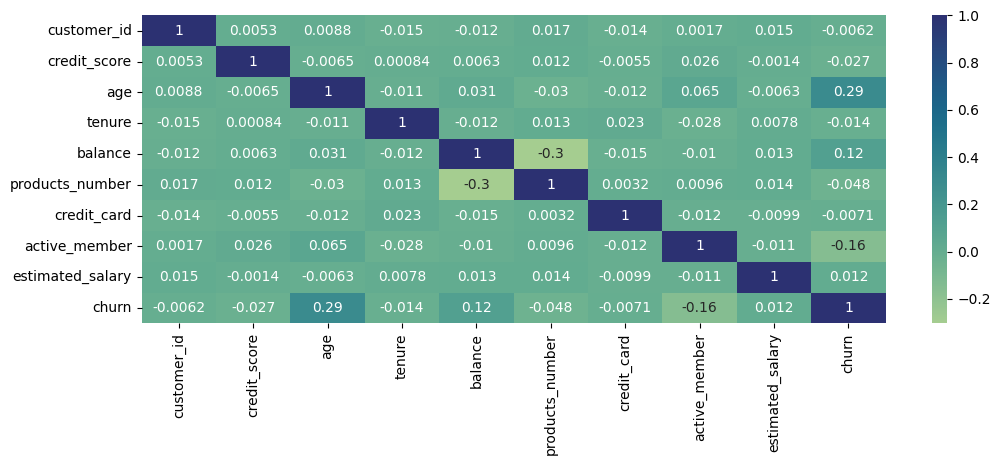

In [29]:
plt.figure(figsize=(12,4))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="crest")


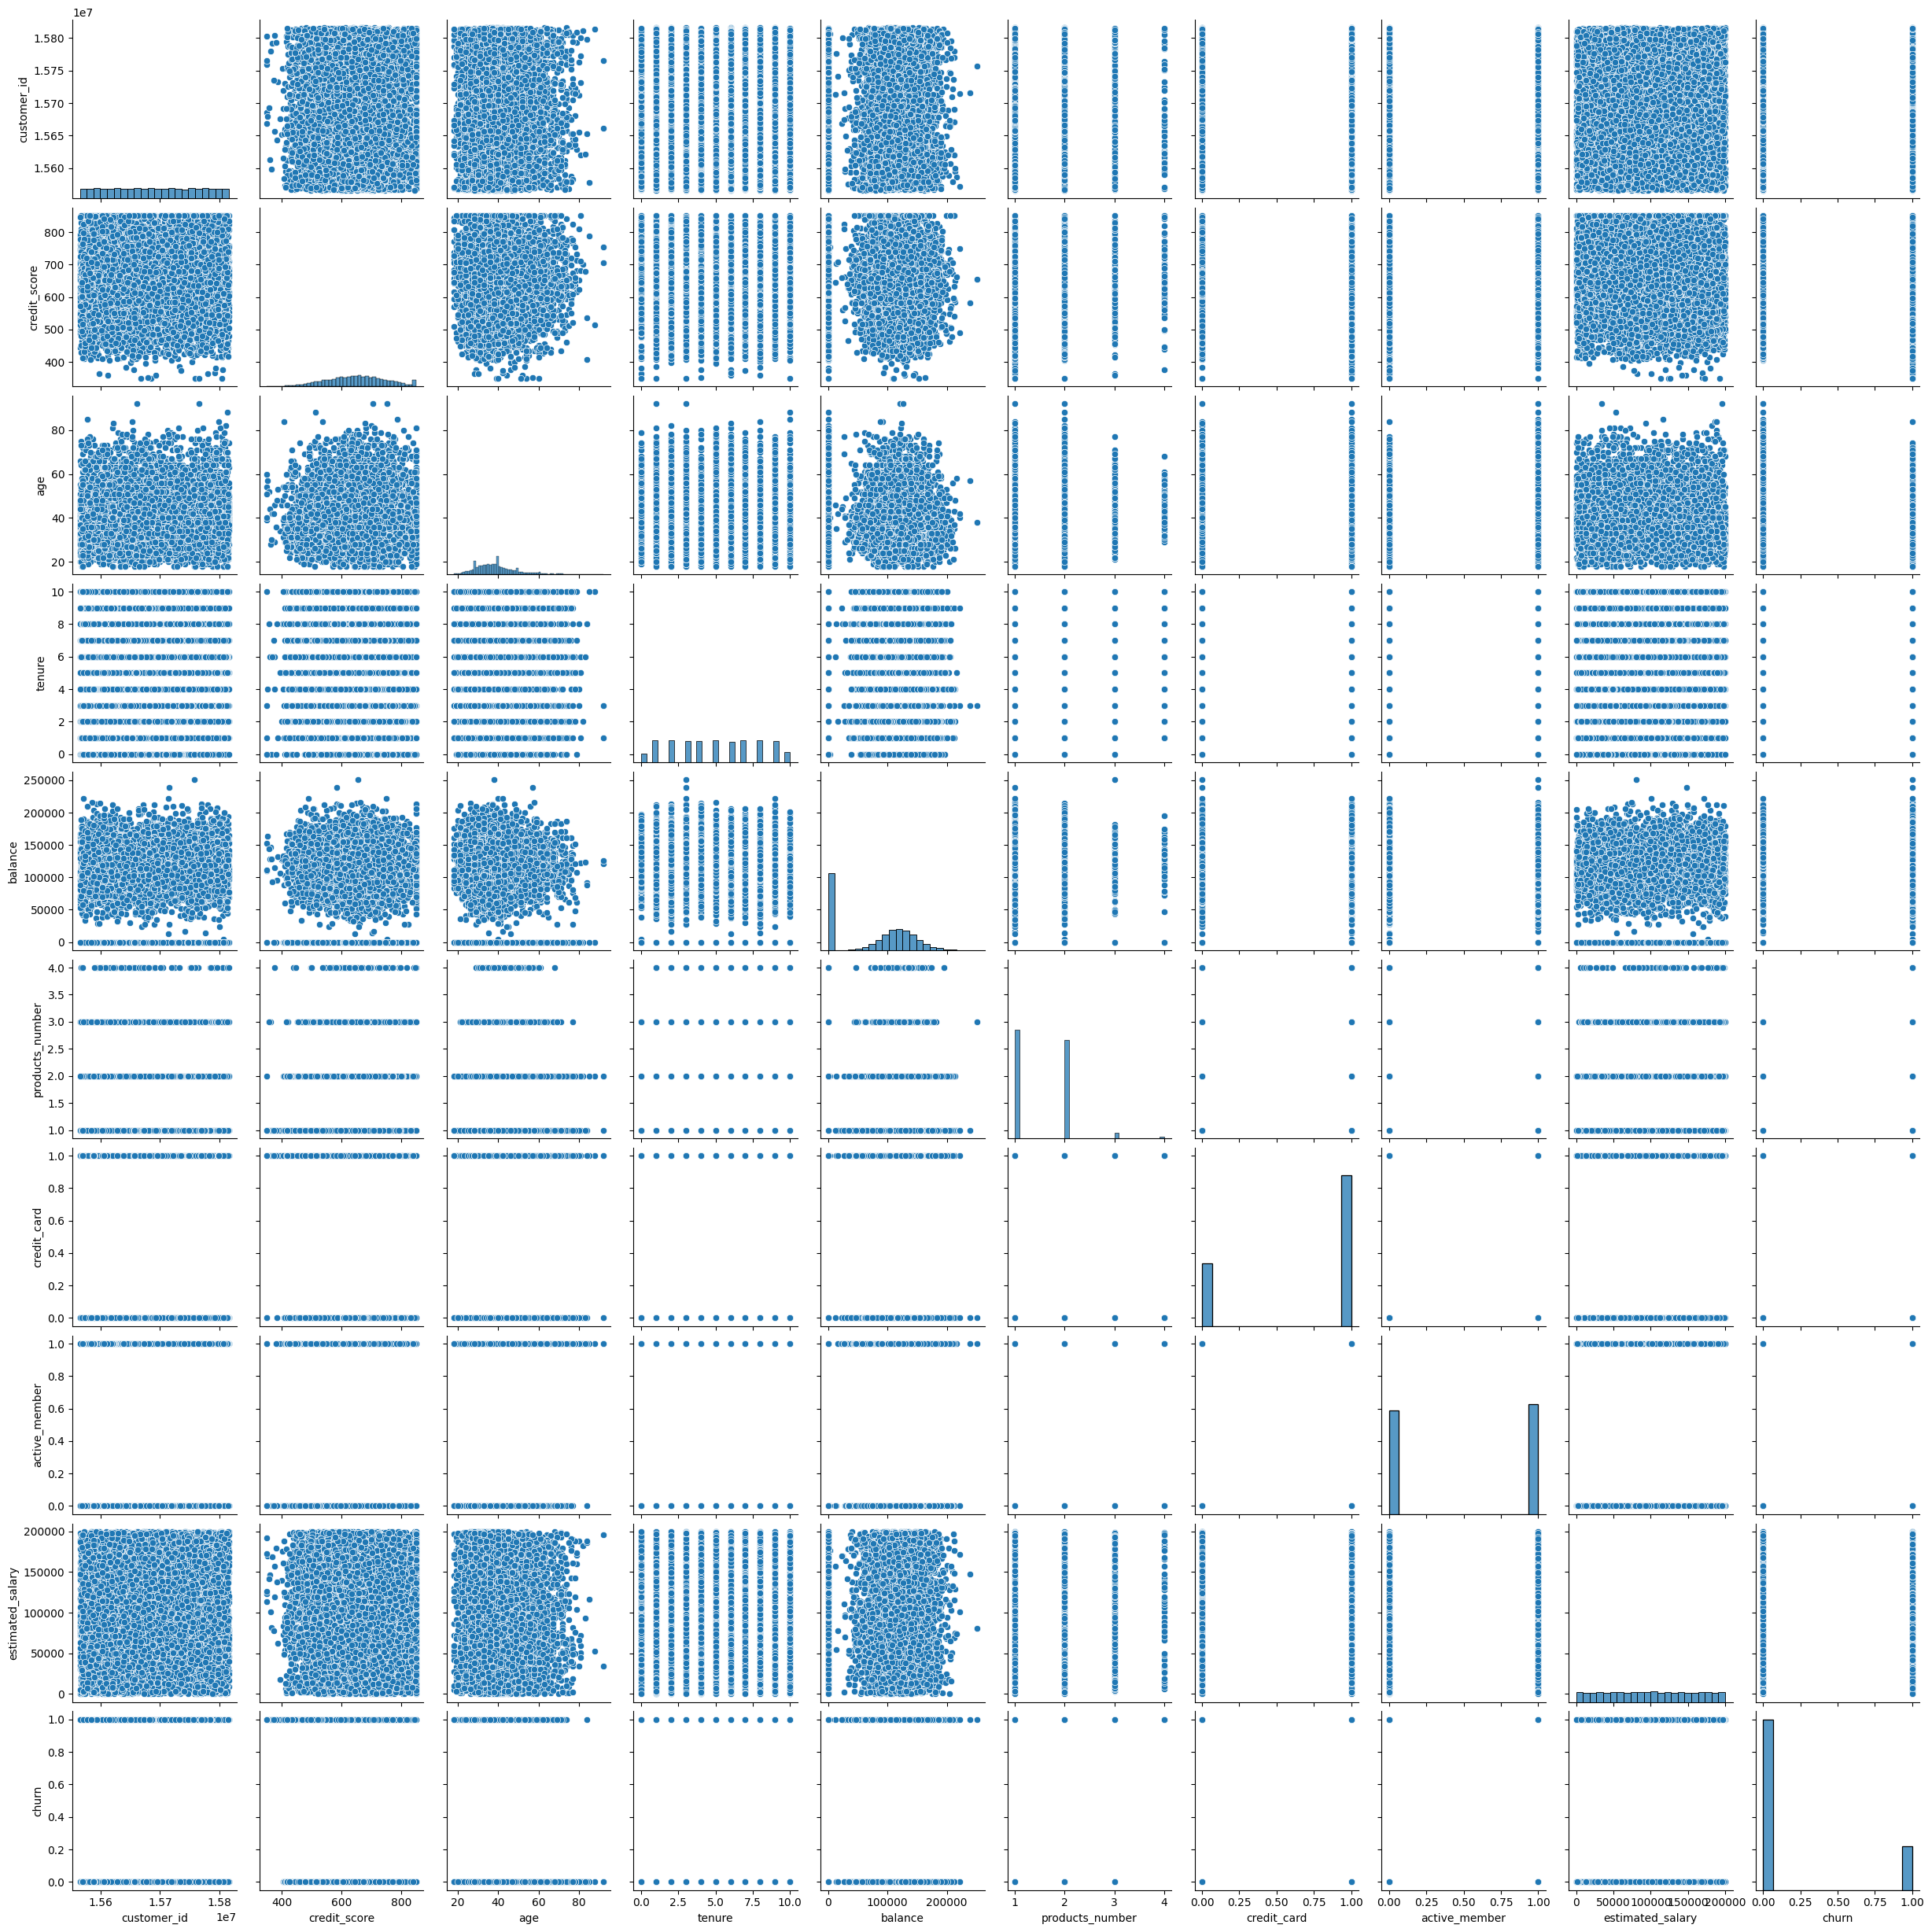

In [12]:
sns.pairplot(df)

In [13]:
def split_cats_nums(dataset):
    categoricals = []
    numericals = []
    for i in dataset.columns:
        if len(dataset[i].unique()) > 5:
            numericals.append(i)
        else:
            categoricals.append(i)
    categoricals = [t for t in categoricals if t!="churn"]
    return categoricals, numericals
categoricals,numericals = split_cats_nums(df)

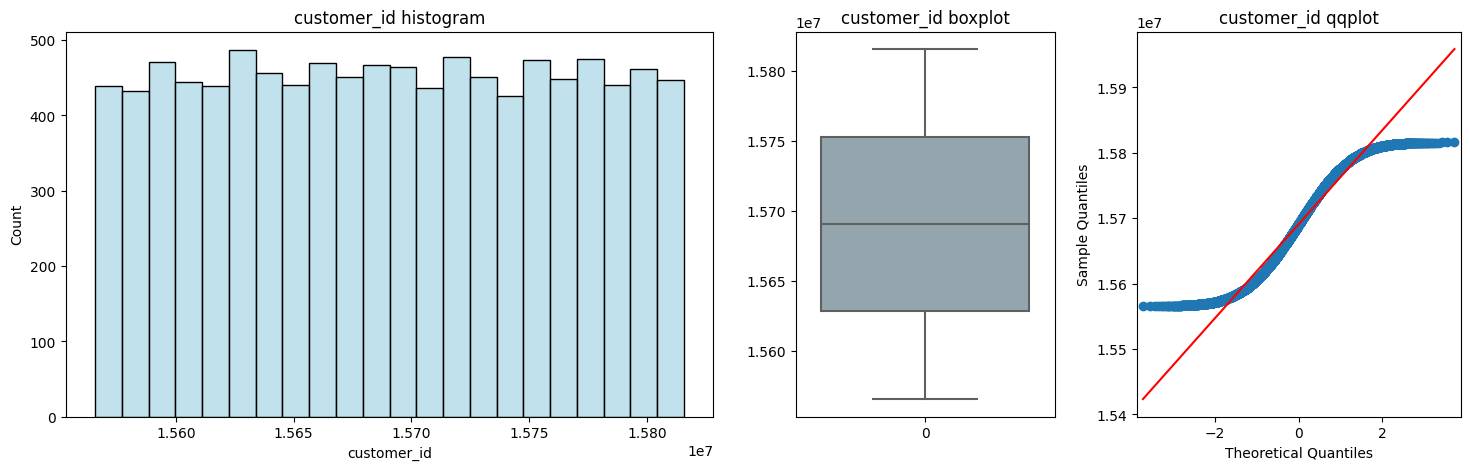

The skewness value for the customer_id is 0.001148973521486491


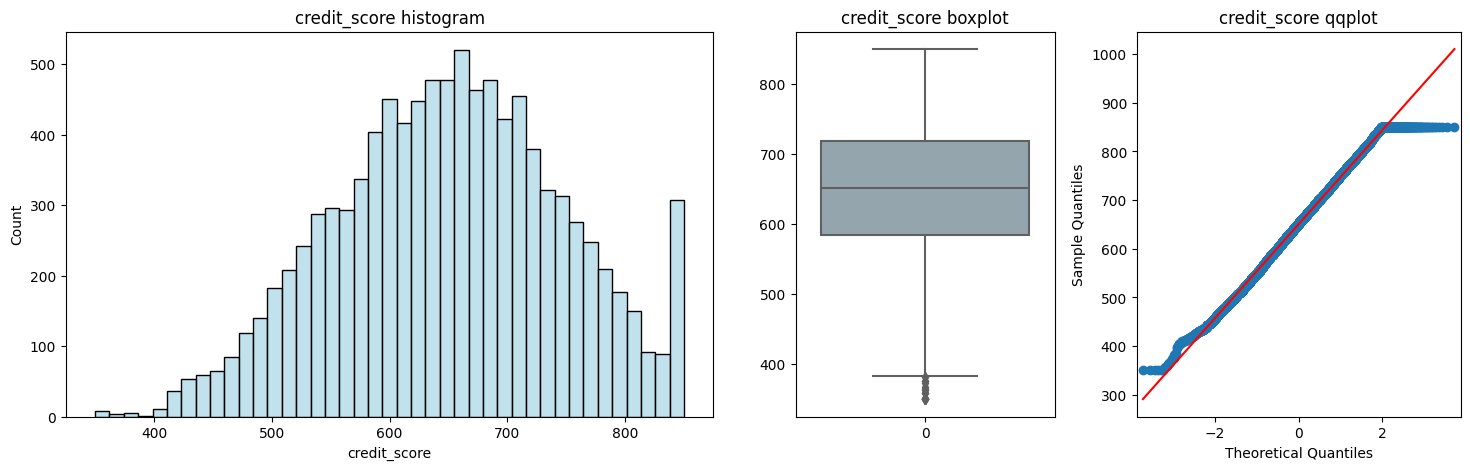

The skewness value for the credit_score is -0.07159586676212397


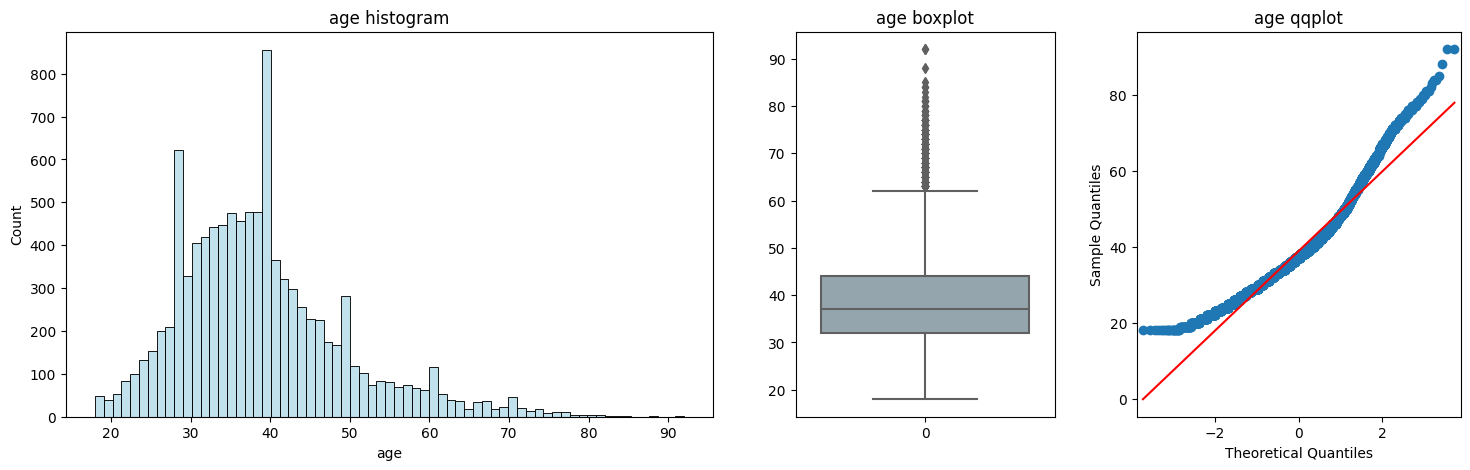

The skewness value for the age is 1.0111685586628079


The skewness value for the tenure is 0.010989809189781041


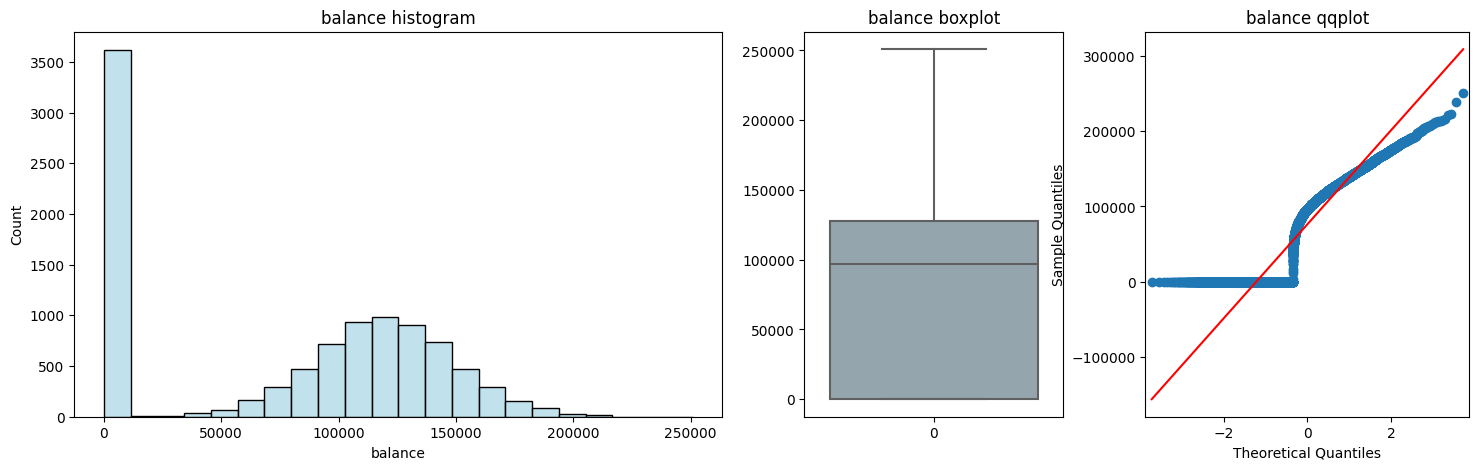

The skewness value for the balance is -0.14108754375291138


The skewness value for the estimated_salary is 0.0020850448448748848


In [14]:
def generate_numerical_viz(data):
    for i in data[numericals]:
        fig, axes = plt.subplots(1,3,figsize = (18,5),gridspec_kw={'width_ratios': [2, 0.8,1]})
        sns.histplot(data[i],ax=axes[0],color = 'lightblue')
        axes[0].set_title(f"{i} histogram")
        sns.boxplot(data[i],ax=axes[1],palette = palette1)
        axes[1].set_title(f"{i} boxplot")
        qqplot(data[i],ax = axes[2],line="s")    
        axes[2].set_title(f"{i} qqplot")
        plt.show()
        print(f"The skewness value for the {i} is {skew(data[i])}")
generate_numerical_viz(df)

In [15]:
df['age'] = np.log1p(df.age)

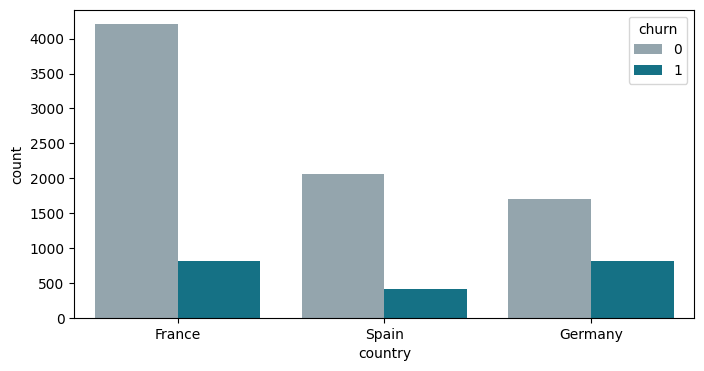

16.15% of customers from France has churned. 
16.67% of customers from Spain has churned. 
32.44% of customers from Germany has churned. 


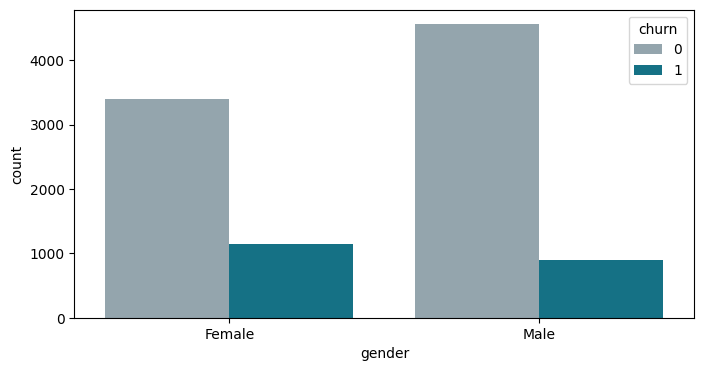

25.07% of customers who are Female has churned. 
16.46% of customers who are Male has churned. 


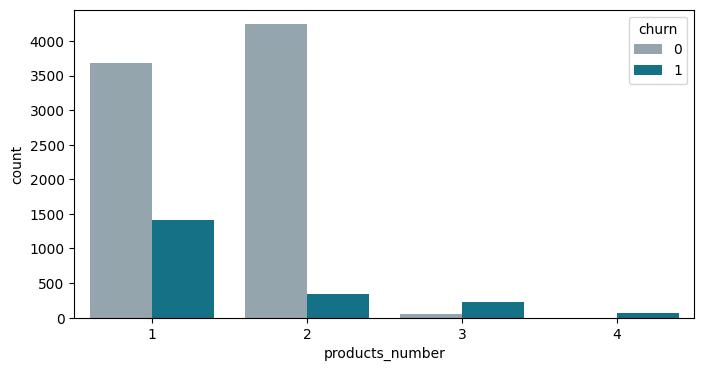

27.71% of customers who use 1 products_number has churned. 
82.71% of customers who use 3 products_number has churned. 
7.58% of customers who use 2 products_number has churned. 
100.0% of customers who use 4 products_number has churned. 


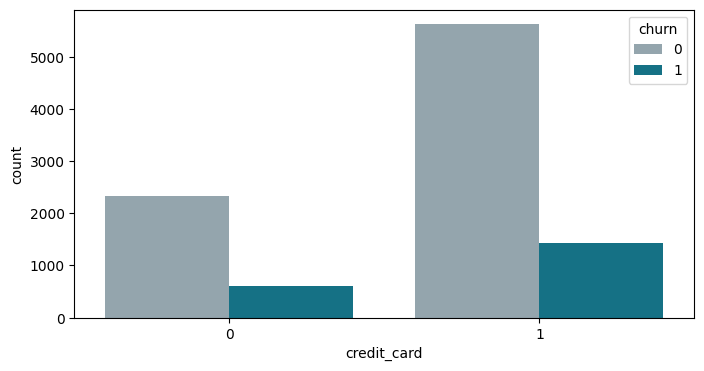

20.18% of customers who use 1 credit_card has churned. 
20.81% of customers who use 0 credit_card has churned. 


14.27% of customers who are 1 has churned. 
26.85% of customers who are 0 has churned. 


In [16]:
def generate_cat_viz(data):
    for i in categoricals :
        plt.figure(figsize=(8,4))
        sns.countplot(data = data, x = i ,hue = "churn",palette = palette3)
        plt.show()
        for x in data[i].unique():
            churn_pcnt = len(data[(data[i] == x) & (data["churn"] == 1)]) / len(data[data[i]==x]) *100
            churn_pcnt = round(churn_pcnt,2)
            if i =="country":
                print(f"{churn_pcnt}% of customers from {x} has churned. ")
            elif i not in(["credit_card","products_number"]):
                print(f"{churn_pcnt}% of customers who are {x} has churned. ")
            else:
                print(f"{churn_pcnt}% of customers who use {x} {i} has churned. ")
generate_cat_viz(df)